In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('Mergedata.csv')
data.head()

,transactionid,customerid,Date,productid,price,qty,totalamount,storeid,productid.1,Product Name,...,age,gender,Marital Status,"Income,",storeid.1,storename,groupstore,Type,latitude,"Longitude,,"
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,P3,Crackers,...,36,0,Married,"10,53",12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,P9,Yoghurt,...,44,1,Married,"14,58",1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,P1,Choco Bar,...,27,1,Single,"0,18",4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,P1,Choco Bar,...,48,1,Married,"12,57",4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,P9,Yoghurt,...,33,0,Married,"6,95",4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


# 1. Data Understanding

## 1.1 Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transactionid   5020 non-null   object
 1   customerid      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   productid       5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   totalamount     5020 non-null   int64 
 7   storeid         5020 non-null   int64 
 8   productid.1     5020 non-null   object
 9   Product Name    5020 non-null   object
 10  price.1         5020 non-null   int64 
 11  customerid.1    5020 non-null   int64 
 12  age             5020 non-null   int64 
 13  gender          5020 non-null   int64 
 14  Marital Status  4976 non-null   object
 15  Income,         5020 non-null   object
 16  storeid.1       5020 non-null   int64 
 17  storename       5020 non-null   object
 18  groupsto

## 1.2 Check duplicated values from the dataset

In [4]:
print("Is there duplicated values?",data.duplicated().any())

Is there duplicated values? False


## 1.3 Check Null Values In The Dataset

In [5]:
data.isnull().sum()

transactionid      0
customerid         0
Date               0
productid          0
price              0
qty                0
totalamount        0
storeid            0
productid.1        0
Product Name       0
price.1            0
customerid.1       0
age                0
gender             0
Marital Status    44
Income,            0
storeid.1          0
storename          0
groupstore         0
Type               0
latitude           0
Longitude,,        0
dtype: int64

In [6]:
data['Marital Status'].value_counts()

Married    3779
Single     1197
Name: Marital Status, dtype: int64

In [7]:
data['Marital Status'] = data['Marital Status'].fillna(data['Marital Status'].mode()[0])

In [8]:
data.isnull().sum()

transactionid     0
customerid        0
Date              0
productid         0
price             0
qty               0
totalamount       0
storeid           0
productid.1       0
Product Name      0
price.1           0
customerid.1      0
age               0
gender            0
Marital Status    0
Income,           0
storeid.1         0
storename         0
groupstore        0
Type              0
latitude          0
Longitude,,       0
dtype: int64

In [9]:
drop_column = [
    #Same Column
    'productid.1',
    'price.1',
    'customerid.1',
    'storeid.1',
    #Useless column
    'latitude',
    'Longitude,,'
]

In [10]:
data = data.drop(drop_column, axis =1)

In [11]:
data.head()

,transactionid,customerid,Date,productid,price,qty,totalamount,storeid,Product Name,age,gender,Marital Status,"Income,",storename,groupstore,Type
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Yoghurt,44,1,Married,"14,58",Prima Tendean,Prima,Modern Trade
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Choco Bar,27,1,Single,"0,18",Gita Ginara,Gita,General Trade
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Choco Bar,48,1,Married,"12,57",Gita Ginara,Gita,General Trade
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Yoghurt,33,0,Married,"6,95",Gita Ginara,Gita,General Trade


In [14]:
aggregated_data = data.groupby('Date')['qty'].sum().reset_index()

In [15]:
# Replace 'your_data.csv' with the path to your CSV file or provide your data in some other way
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])
aggregated_data.set_index('Date', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23248\3167216592.py:2: UserWarning: Parsing '13/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23248\3167216592.py:2: UserWarning: Parsing '13/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23248\3167216592.py:2: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23248\3167216592.py:2: UserWarning: Parsing '13/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.


In [16]:
# Replace 'qty_column' with the name of the column containing your time series quantity values
ts = aggregated_data['qty']

# Define the ARIMA model parameters (p, d, q)
p = 1  # Order of the autoregressive (AR) part
d = 1  # Degree of differencing (I) part
q = 1  # Order of the moving average (MA) part

# Create and fit the ARIMA model
model = ARIMA(ts, order=(p, d, q))
results = model.fit()

# Make predictions
forecast_steps = 10  # Replace this with the number of steps you want to forecast
forecast = results.forecast(steps=forecast_steps)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packa

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23248\1796371151.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, closed='right')


ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

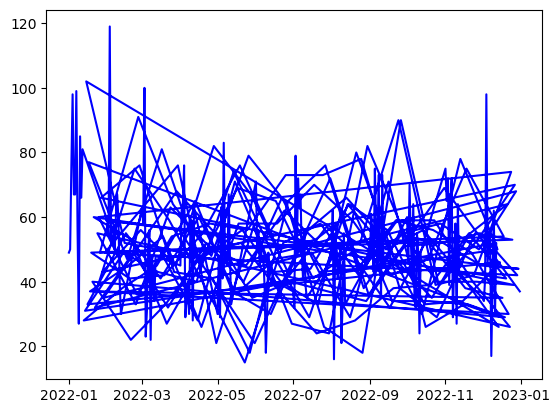

In [17]:
# Plot the original time series data
plt.plot(ts.index, ts.values, label='Original Data', color='blue')

# Plot the forecasted values
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, closed='right')
plt.plot(forecast_index[1:], forecast, label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

## Implementation Machine Learning

In [18]:
data.columns

Index(['transactionid', 'customerid', 'Date', 'productid', 'price', 'qty',
       'totalamount', 'storeid', 'Product Name', 'age', 'gender',
       'Marital Status', 'Income,', 'storename', 'groupstore', 'Type'],
      dtype='object')

In [20]:
new_data = data.groupby('customerid').agg({'transactionid' : ['count'],
                                              'qty' : ['sum'],
                                              'totalamount':['sum']})

new_data

,transactionid,qty,totalamount
,count,sum,sum
customerid,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700


In [21]:
new_data.describe()

,transactionid,qty,totalamount
,count,sum,sum
count,447.000000,447.000000,447.000000
mean,11.230425,40.930649,362512.304251
std,3.245302,12.756679,124634.279184
min,3.000000,10.000000,92100.000000
25%,9.000000,32.000000,271750.000000
50%,11.000000,40.000000,354200.000000
75%,14.000000,50.000000,441200.000000
max,21.000000,79.000000,846700.000000


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['transactionid', 'qty', 'totalamount']

for col in norm_col:
    new_data[col + '_NORM'] = MinMaxScaler().fit_transform(new_data[col].values.reshape(len(new_data), 1))

In [25]:
new_data_std = new_data[['transactionid_NORM','qty_NORM','totalamount_NORM']]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ut

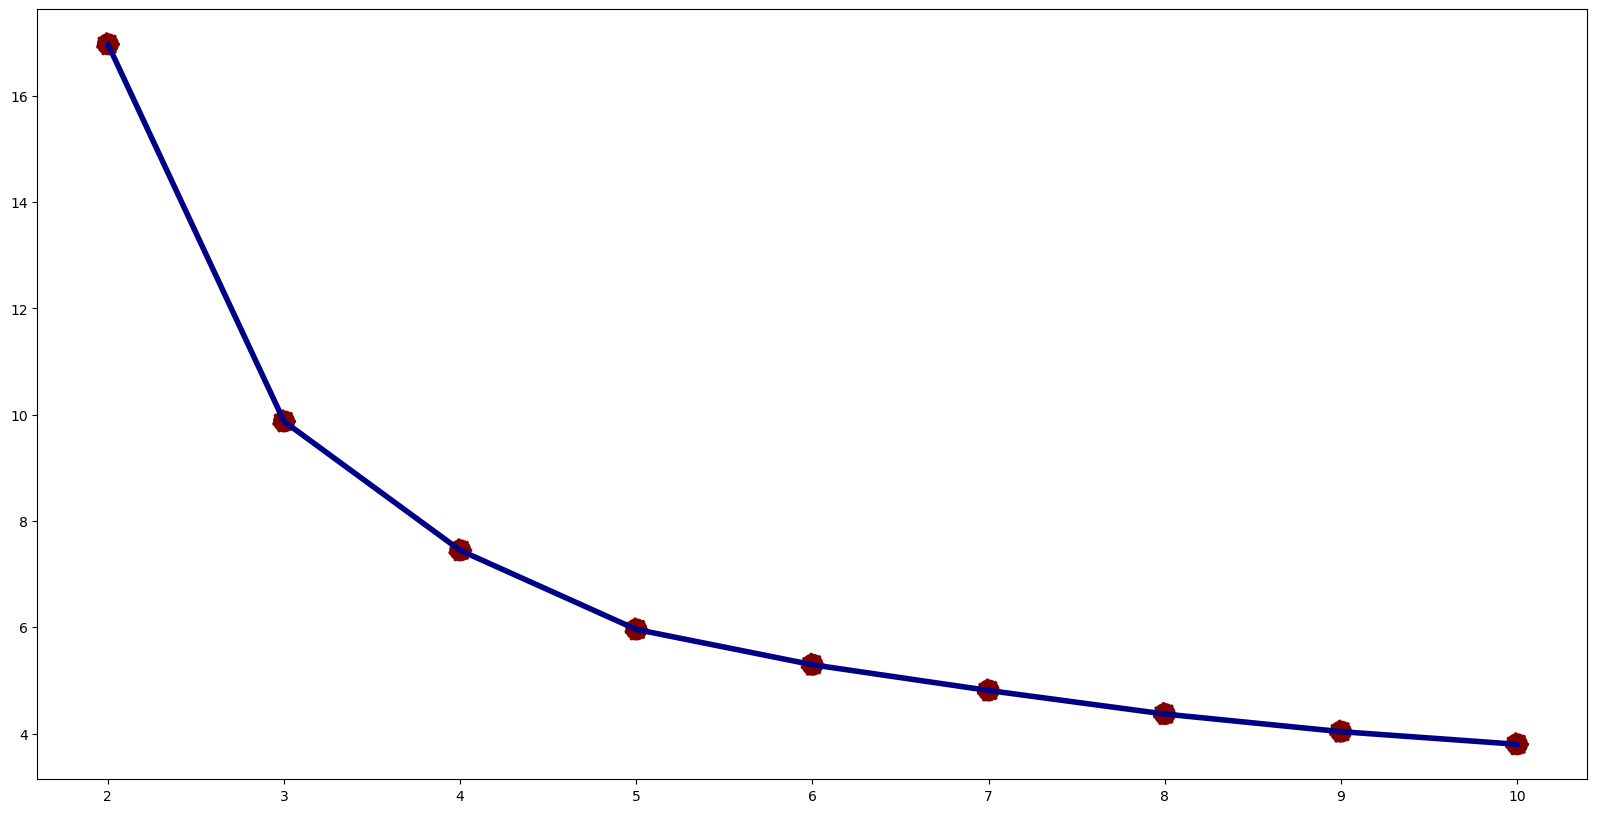

In [26]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_data_std)
    preds = kmeans.predict(new_data_std)
     
    score_euclidean = silhouette_score(new_data_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ut

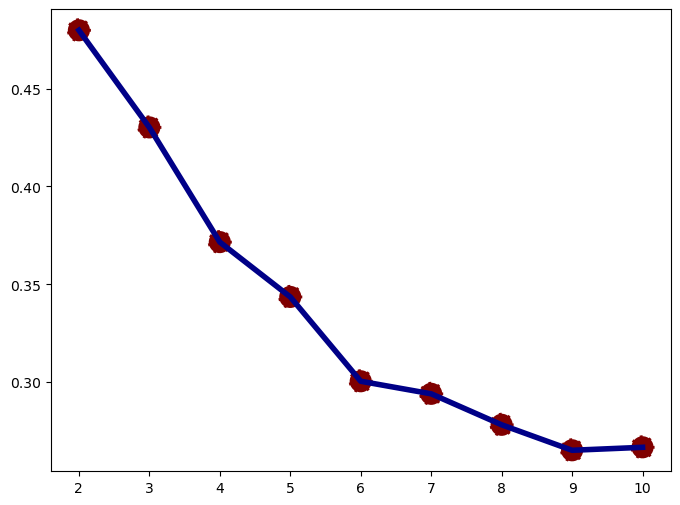

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(new_data_std)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
clusters = kmeans.labels_

In [40]:
new_data['clusters'] = clusters

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(new_data_std)
pcs = pca.transform(new_data_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,PC 1,PC 2
0,0.765375,0.206540
1,0.615310,-0.078200
2,0.659491,0.005755
3,-0.389008,0.162934
4,-0.524896,-0.091217


In [42]:
df_pca['clusters'] = clusters
df_pca.head(2)

,PC 1,PC 2,clusters
0,0.765375,0.20654,0
1,0.615310,-0.07820,0


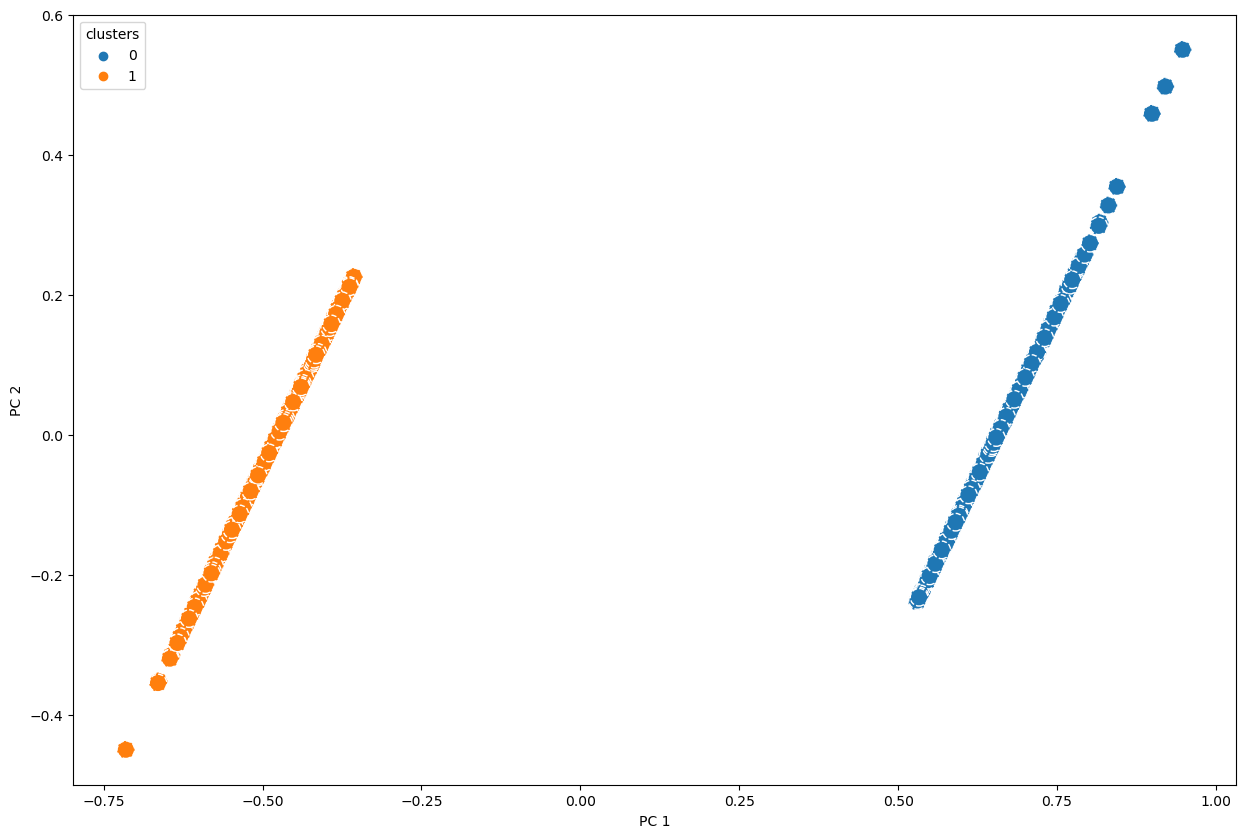

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

In [45]:
new_data[['transactionid', 'qty', 'totalamount','clusters']].groupby('clusters').median()

,transactionid,qty,totalamount
,count,sum,sum
clusters,,,
0,14.0,52.0,460900.0
1,9.0,33.0,283500.0


In [46]:
new_data['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

,clusters,total_members
0,1,259
1,0,188
